Ονοματεπώνυμο: Σοφία Κυριακή Μαχαίρα <br>

# Υπολογιστική Γεωμετρία: Εργασία Σεπτεμβρίου
<br>

**Υλοποίηση Α 1. / Εφαρμογή Α 1.α** <br>

Εφαρμογή Α 1.γ

> Εύρεση κυρτού περιβλήματος στο επίπεδο με αυξητικό αλγόριθμο Graham's Scan. Χρησιμοποιείται επίσης αλγόριθμος δημιουργίας 100 τυχαίων σημειών, τα ταξινομούμε λεξικογραφικά κι αξιοποιείται αλγόριθμος εύρεσης ορίζουσας κι παραγωγής σχήματος. Συμπεριλαμβάνεται οπτικοποίηση των βημάτων κατά την κατασκευή.

Calling algorithm...
Creating 100 points...
All the points are: [(3, 326), (9, 178), (18, 539), (39, 418), (42, 142), (51, 613), (64, 142), (77, 161), (89, 730), (99, 620), (99, 926), (120, 228), (125, 749), (129, 256), (130, 496), (144, 998), (145, 805), (150, 351), (154, 667), (163, 924), (190, 324), (210, 818), (215, 876), (229, 113), (232, 404), (244, 417), (261, 392), (263, 289), (271, 866), (279, 925), (280, 408), (316, 505), (325, 106), (325, 467), (338, 837), (342, 745), (347, 113), (348, 664), (355, 328), (379, 219), (382, 887), (395, 502), (439, 268), (447, 535), (447, 860), (459, 947), (470, 852), (484, 81), (485, 926), (511, 300), (515, 92), (516, 157), (519, 759), (519, 804), (525, 35), (531, 330), (549, 187), (573, 293), (588, 753), (596, 968), (614, 154), (637, 866), (645, 563), (649, 733), (679, 579), (690, 747), (724, 573), (725, 432), (727, 171), (742, 605), (748, 650), (754, 902), (759, 694), (769, 331), (784, 279), (800, 449), (815, 838), (824, 467), (826, 472), (82

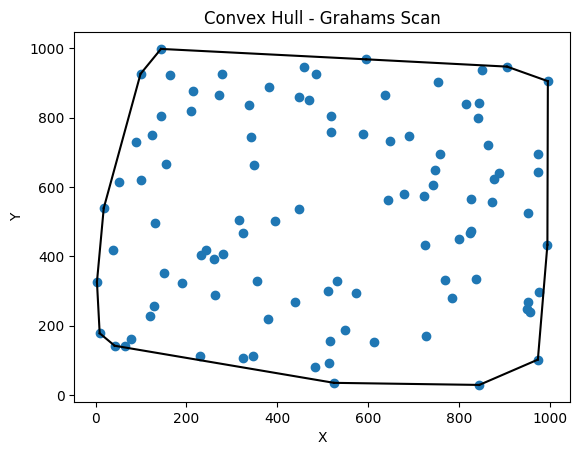

In [ ]:
import random # For varied results
import matplotlib.pyplot as pyplot # To use for graph
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def points_generator2D(num) :
    print("Creating " + str(num) + " points...")
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 999)
            y = random.randint(0, 999)
            if (x, y) not in points :
                points.append((x, y))
                break
    return points

def ccw(i, j, k) :
    print("Calculating ccw of: ", end="")
    print(i, end=", ")
    print(j, end=", ")
    print(k)
    det = j[0]*k[1] - k[0]*j[1] - i[0]*k[1] + i[1]*k[0] + i[0]*j[1] - i[1]*j[0]
    if det == 0:
        return 0 # not in general position
    elif det > 0:
        return 1 #ccw
    else:
        return -1 #cw

def graph_hull(points) :
    print('Creating graphic...')
    l_array = np.array(points)
    hull = ConvexHull(l_array)
    pyplot.plot(l_array[:, 0], l_array[:, 1], 'o')
    for simplex in hull.simplices :
        pyplot.plot(l_array[simplex, 0], l_array[simplex, 1], 'k-')
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    pyplot.title('Convex Hull - Grahams Scan')
    pyplot.show()

# Graham's Scan using class notes
def grahams_scan(num) :
    points = points_generator2D(num)
    points.sort()
    print("All the points are: ", end="")
    print(points)
    print("Adding first two points to Lάνω...")
    LAno = []
    LAno.append(points[0])
    LAno.append(points[1])
    for i in range(2, num) :
      LAno.append(points[i])
      size = len(LAno)
      print("Checking size of Lάνω and ccw...")
      while (size > 2) and (ccw(LAno[size -1], LAno[size - 2], LAno[size -3]) <= 0) :
        LAno.pop(size - 2)
        print("Popped middle point")
        size = len(LAno)

    print("Adding first two points to Lκάτω...")
    LKato = []
    LKato.append(points[num - 1])
    LKato.append(points[num - 2])
    for i in range(num - 3, -1, -1) :
        LKato.append(points[i])
        size2 = len(LKato)
        print("Checking size of Lκάτω and ccw...")
        while (size2 > 2) and ccw(LKato[size2 -1], LKato[size2 - 2], LKato[size2 -3]) <= 0 :
          LKato.pop(size2 - 2)
          print("Popped middle point")
          size2 = len(LKato)

    LKato.pop(0)
    sizeLKato = len(LKato) - 1
    LKato.pop(sizeLKato)
    L = []
    print("Combining Lάνω and Lκάτω")
    for x, y in LAno:
      L.append((x,y))
    for x, y in LKato:
      L.append((x,y))

    print("Final L is: ", end = "")
    print(L)
    graph_hull(points)
    return L

print("Calling algorithm...")
L = grahams_scan(100) # Execute algorithm for 100 points


> Εύρεση κυρτού περιβλήματος στο επίπεδο με αλγόριθμο περιτυλίγματος.



All the points are: [(678, 40336), (1207, 37214), (1518, 77385), (3166, 16141), (3582, 77322), (4444, 10431), (5248, 93295), (6846, 96422), (7591, 79788), (8241, 24313), (8540, 206), (8827, 88442), (10236, 34280), (10713, 18524), (13242, 30209), (14082, 45074), (14555, 28010), (14692, 82357), (14860, 25057), (15603, 15511), (18609, 65056), (20714, 40232), (22786, 3551), (23237, 29360), (23374, 26075), (23804, 13425), (24590, 40678), (25954, 19200), (27141, 74929), (27246, 61858), (28507, 18967), (29192, 59113), (30374, 17169), (30552, 10328), (33127, 51728), (33304, 33403), (34253, 58781), (35605, 18480), (35611, 2926), (37395, 24862), (40692, 26118), (42127, 21980), (44462, 12744), (44482, 68820), (44798, 22137), (45099, 76269), (45517, 75038), (48285, 29869), (48658, 66276), (48662, 42678), (49238, 12758), (50601, 75567), (51034, 32049), (51896, 74223), (53011, 38097), (54671, 37592), (55023, 31841), (58419, 69740), (59097, 44170), (59514, 94356), (59565, 11315), (59998, 2013), (6024

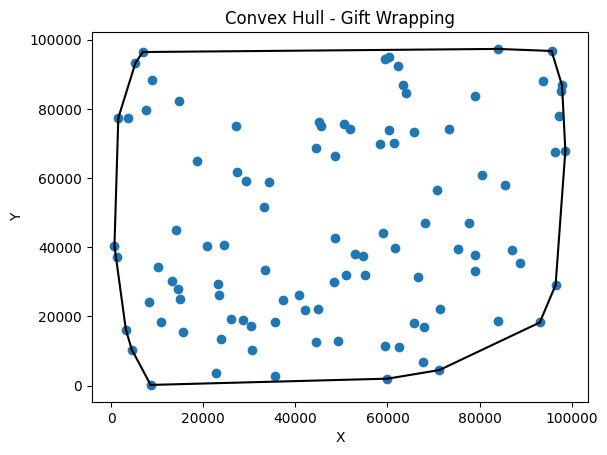

In [ ]:
import random # For varied results
import matplotlib.pyplot as pyplot # To use for graph
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import math

def points_generator2D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 99999)
            y = random.randint(0, 99999)
            if (x, y) not in points :
                points.append((x, y))
                break
    return points

def ccw(i, j, k) :
    det = j[0]*k[1] - k[0]*j[1] - i[0]*k[1] + i[1]*k[0] + i[0]*j[1] - i[1]*j[0]
    if det == 0:
        return 0 # not in general position
    elif det > 0:
        return 1 #ccw
    else:
        return -1 #cw

def graph_hull(points) :
    l_array = np.array(points)
    hull = ConvexHull(l_array)
    pyplot.plot(l_array[:, 0], l_array[:, 1], 'o')
    for simplex in hull.simplices :
        pyplot.plot(l_array[simplex, 0], l_array[simplex, 1], 'k-')
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    pyplot.title('Convex Hull - Gift Wrapping')
    pyplot.show()

def distance(a,b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def is_between(r, u, t):
    return (distance(r, u) + distance(u, t) == distance(r, t))

# Gift-wrapping or Jarvis March algorithm using class notes
def gift_wrap(num) :
    points = points_generator2D(num)
    points.sort()
    print("All the points are: ", end="")
    print(points)
    chain = []
    r0 = points[0]
    r = points[1]
    chain.append(r0)
    chain.append(r)
    p2 = []
    for i in points :
      p2.append(i)
    p2.pop(1)
    while True :
      u = random.choice(p2)
      p1 = []
      for i in p2 :
        if ((i[0] != u[0]) and (i[1] != u[1])) :
          p1.append(i)
      for t in p1 :
        det = ccw(r, u, t)
        if ((det < 0) or ((det == 0) and (is_between(r, u, t) == True))) :
          u = t
      if u == r0 :
        print(chain)
        graph_hull(points)
        return chain
      else:
        r = u
        p2.remove(r)
        chain.append(r)
    return chain

L = gift_wrap(100) # Number of points can be altered

> Εύρεση ΚΠ2 με χρήση αλγορίθμου QuickHull, αξιοποιώντας την έτοιμη συνάρτηση που προσφέρει η γλώσσα Python.

All the points are: [(35, 2635), (54, 2476), (311, 9724), (479, 1144), (479, 9352), (586, 6029), (844, 1384), (899, 8610), (1075, 2230), (1161, 3485), (1168, 8212), (1181, 2726), (1310, 4937), (1480, 3080), (1502, 1907), (1627, 9599), (1648, 358), (1763, 2487), (1785, 5120), (1828, 2762), (2062, 9853), (2202, 2020), (2523, 112), (2711, 4439), (2712, 3554), (2840, 9587), (2862, 3404), (3046, 2234), (3155, 7976), (3282, 6037), (3285, 5967), (3327, 6768), (3495, 404), (3521, 927), (3589, 6533), (3638, 1798), (3677, 4371), (4162, 8721), (4163, 2746), (4254, 1837), (4275, 8231), (4286, 2562), (4299, 1979), (4436, 3797), (4462, 1995), (4674, 5241), (4731, 2513), (4821, 4812), (4849, 3142), (4963, 9692), (5038, 7456), (5064, 4963), (5171, 8670), (5178, 6412), (5266, 8322), (5292, 4671), (5432, 8176), (5596, 9323), (5713, 9710), (5808, 1271), (5834, 7950), (5994, 1072), (6181, 8602), (6202, 3118), (6622, 920), (6746, 2111), (6856, 3157), (6879, 3061), (6943, 641), (6997, 3138), (7019, 2575), (

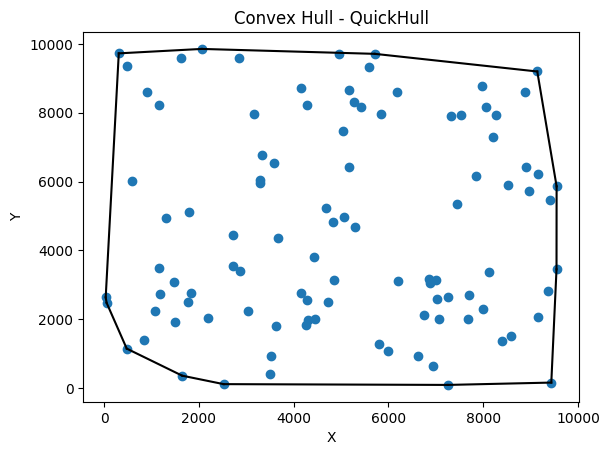

In [ ]:
import random # For varied results
import matplotlib.pyplot as pyplot # To use for graph
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def points_generator2D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 9999)
            y = random.randint(0, 9999)
            if (x, y) not in points :
                points.append((x, y))
                break
    return points

def graph_hull(points) :
    l_array = np.array(points)
    hull = ConvexHull(l_array)
    pyplot.plot(l_array[:, 0], l_array[:, 1], 'o')
    for simplex in hull.simplices :
        pyplot.plot(l_array[simplex, 0], l_array[simplex, 1], 'k-')
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    pyplot.title('Convex Hull - QuickHull')
    pyplot.show()

# QuickHull algorithm using Python libraries
def quickhull(num) :
    points = points_generator2D(num)
    points.sort()
    print("All the points are: ", end="")
    print(points)
    L_array = np.array(points)
    L = ConvexHull(L_array)
    L1 = []
    for simplex in L.simplices:
      L1.append(simplex[0])
      L1.append(simplex[1])
    setL1 = set(L1)
    for item in setL1:
      print(points[item], end= ", ")
    print("are the points in the Convex Hull.")
    graph_hull(points)
    return L

L = quickhull(100)

**Εφαρμογή Α 1.β**

> Σύγκριση αλγορίθμων που προηγήθηκαν: (Πλήθος σημείων, Χρόνος Υλοποίησης) <br>
Graham's Scan: O(nlogn), (1000, 10"), (5000, 33"), (10000, 1 λεπτό)<br>
Gift Wrapping: O(nh), (1000, 1"), (5000, 1"), (10000, 2")<br>
Divide & Conquer: O(nlogn), (1000, 1"), (5000, 3"), (10000, 3")<br>
QuickHull: O(nlogn), (1000, 1"), (5000, 1"), (10000, 2")<br>

**Εφαρμογή Α 2.**
> Κατασκευή ΚΠ3 με αλγόριθμο QuickHull, αξιοποιώντας βιβλιοθήκες της Python.


All the points are: [(984, 351, 172), (984, 1, 188), (975, 962, 176), (938, 954, 491), (917, 741, 372), (916, 786, 264), (903, 770, 980), (902, 68, 331), (900, 956, 165), (872, 619, 230), (867, 360, 631), (846, 317, 979), (839, 98, 47), (806, 968, 6), (782, 204, 331), (764, 809, 807), (764, 558, 696), (744, 921, 244), (739, 899, 235), (736, 885, 52), (736, 45, 8), (716, 133, 147), (690, 33, 661), (687, 270, 780), (653, 587, 665), (650, 262, 992), (636, 355, 200), (628, 0, 387), (620, 713, 176), (608, 989, 504), (604, 144, 805), (592, 670, 678), (577, 642, 551), (569, 593, 372), (566, 779, 966), (560, 62, 565), (529, 19, 273), (521, 638, 318), (502, 717, 865), (500, 637, 158), (497, 145, 931), (490, 827, 548), (482, 424, 483), (472, 432, 30), (470, 885, 907), (465, 286, 337), (461, 94, 725), (451, 809, 194), (435, 47, 199), (430, 295, 465), (426, 58, 292), (413, 984, 475), (413, 537, 287), (413, 12, 341), (410, 601, 808), (393, 100, 112), (392, 558, 323), (391, 109, 175), (388, 399, 653

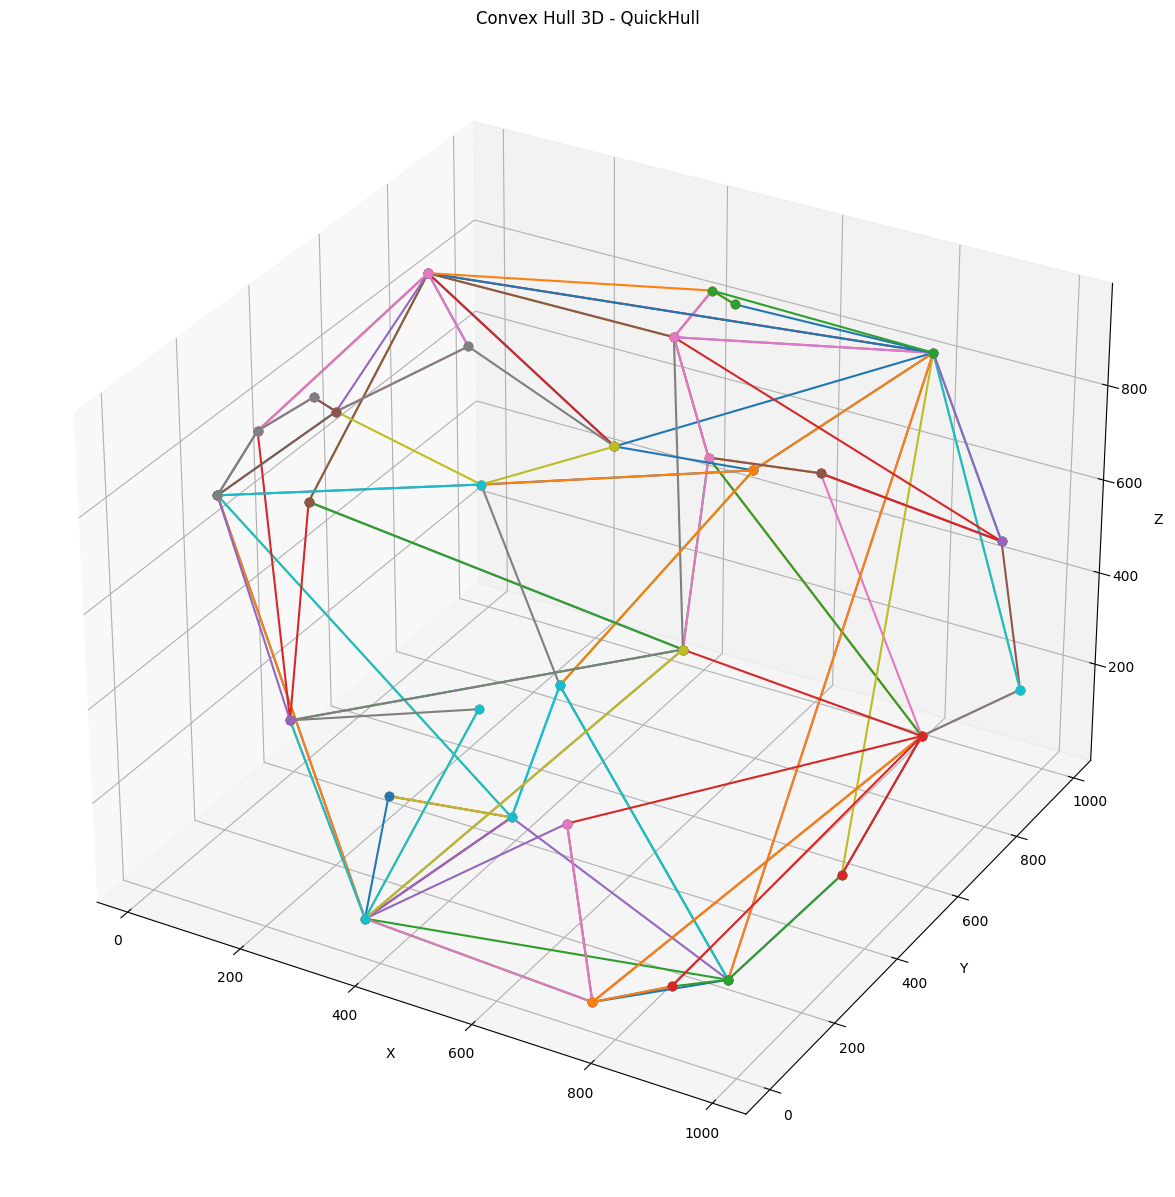

In [ ]:
import random # For varied results
import matplotlib.pyplot as pyplot # To use for graph
import numpy as np
from scipy.spatial import ConvexHull

def points_generator3D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 999)
            y = random.randint(0, 999)
            z = random.randint(0, 999)
            if (x, y, z) not in points :
                points.append((x, y, z))
                break
    return points

# QuickHull algorithm based on Python libraries
def quickhull3d(num) :
    points = points_generator3D(num)
    points.sort(reverse = True)
    print("All the points are: ", end="")
    print(points)
    L = []
    L_array = np.array(points)
    L = ConvexHull(L_array)
    L1 = []
    for simplex in L.simplices:
      L1.append(simplex[0])
      L1.append(simplex[1])
    setL1 = set(L1)
    for item in setL1:
      print(points[item], end= ", ")
    print("are the points in the Convex Hull.")
    fig = pyplot.figure(figsize = (15,15)) # Graph
    ax = pyplot.axes(projection="3d")
    for simplex in L.simplices:
      ax.plot3D(L_array[simplex, 0], L_array[simplex, 1], L_array[simplex, 2], 'o-')
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    ax.set_zlabel('Z')
    pyplot.title('Convex Hull 3D - QuickHull')
    return L

L = quickhull3d(80)

**Εφαρμογή Α 3.** <br>

>  Από τους παραπάνω 4 αλγορίθμους, όλοι γενικεύονται σε
περισσότερες από 3 διαστάσεις. <br>
O Graham's Scan μπορεί να γίνει χάρις τη γενικευσή του από τον Seidel. Υπολογίζει τη μερική λύση που βελτιστοποιεί την αντικειμενική συνάρτηση κι ικανοποιεί όλους τους περιορισμούς. Σε κάθε βήμα, προσθέτει τον επόμενο περιορισμό και τερματίζει αν για κάποιο σημείο η τομή των περιορισμών μηδενίζει ή βρει το ολικό ελάχιστο. <br>
Εντωμεταξύ, ο αλγόριθμος περιτυλίγματος μέσω αρχικοποίησης/υπολογισμού δομής ΡΑΧ με ράχες (F\{x}, {x}) για κάθε x που ανήκει στο F κι όσο η δομή αυτή έχει στοιχεία, υπολογίζει κι τυπώνει την άλλη έδρα του κάθε στοιχείου (R, c). Για κάθε κορυφή που ανήκει στο F αν υπάρχει σημείο y, αν στη ράχη ανήκει το (F-{x}, y) τότε την διαγράφει, ειδάλλως εισαγάγει το (F-{x},x) στη δομή. Επομένως, μπορεί να χρησιμοποιηθεί σε d>3 διαστάσεις.<br>
Ο αλγόριθμος Διαίρει κι Βασίλευε μπορεί να γενικευτεί σε d διαστάσεις διότι βασίζεται στον χωρισμό του προβλήματος σε 2 ισομεγέθη μικρότερα. Εφόσον, λοιπόν, υπάρχει αλγόριθμος εύρεση ΚΠd, μπορεί να εφαρμοστεί αναδρομικά με Διαίρει κι Βασίλευε. <br>
Ο QuickHull μπορεί επίσης να γενικευτεί. Αυτό ισχύει διότι βρίσκει τα ακραία σημεία ανάλογα με τις διαστάσεις κι σχηματίζει αντίστοιχα πολύγωνο του οποίου τα εσωτερικά σημεία αγνοεί. Κατόπιν, υπολογίζει το ΚΠ σε κάθε περιοχή εκτός του πολυγώνου.


**Υλοποίηση Β / Εφαρμογή Β:** Γεωμετρική Αναζήτηση <br>

> ΄Εστω P ένα σύνολο n σημείων στο επίπεδο. Υλοποίηση αλγόριθμου
ορθογώνιας γεωμετρικής αναζήτησης για το σύνολο σημείων P, δημιουργία ΚD-δέντρου.

All the points are: [(0, 351), (22, 41), (26, 731), (32, 512), (33, 244), (39, 807), (41, 425), (73, 525), (98, 394), (109, 35), (118, 750), (123, 30), (128, 256), (147, 358), (167, 372), (191, 565), (207, 887), (227, 499), (229, 5), (245, 960), (247, 113), (292, 586), (323, 555), (325, 34), (334, 40), (370, 570), (386, 93), (389, 499), (409, 474), (419, 660), (420, 175), (436, 529), (440, 467), (443, 53), (448, 235), (465, 154), (480, 558), (482, 146), (487, 364), (493, 316), (531, 845), (552, 789), (562, 201), (579, 628), (591, 121), (592, 289), (595, 676), (619, 470), (636, 408), (659, 798), (682, 708), (689, 274), (701, 619), (706, 962), (717, 386), (744, 984), (786, 630), (821, 830), (829, 837), (830, 332), (837, 238), (843, 108), (873, 722), (904, 768), (922, 682), (934, 278), (951, 808), (978, 756), (990, 883), (995, 204)]
[(22, 41), (33, 244), (109, 35), (123, 30), (128, 256), (229, 5), (247, 113)] are the results.


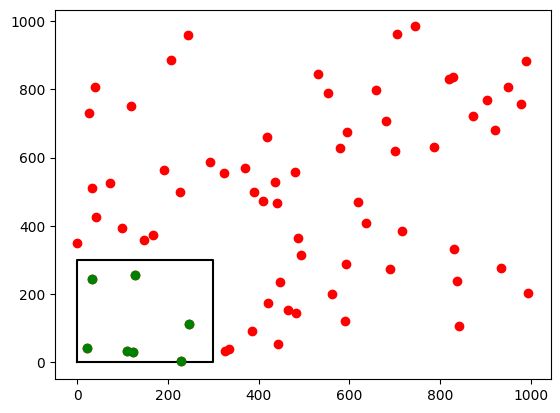

In [ ]:
import random # For varied results
import matplotlib.pyplot as pyplot # To use for graph
import numpy as np
import math

def pointsgenerator2D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 999)
            y = random.randint(0, 999)
            if x not in points and y not in points:
                points.append((x, y))
                break
    return points

def graph_search(points, result, ektasi) :
    # To connect the points, find the edges of the rectangle they create
    rectangle = [(ektasi[0][0], ektasi[1][0]), (ektasi[0][1], ektasi[1][0]), (ektasi[0][1], ektasi[1][1]), (ektasi[0][0], ektasi[1][1]), (ektasi[0][0], ektasi[1][0])]
    for (x, y) in points:
      pyplot.plot(x, y, 'ro')
    x = []
    y = []
    for i in range(0, 5):
      x.append(rectangle[i][0])
      y.append(rectangle[i][1])
    pyplot.plot(x, y, 'k-')
    for (x, y) in result:
      pyplot.plot(x, y, 'go')
    print(result, end=" ")
    print("are the results.")
    pyplot.show()
    return

# Creation of KD-Tree is necessary
def node_kd_tree(left, right, points) :
    node_kd_tree = []
    node_kd_tree.append(left)
    node_kd_tree.append(right)
    if points is None :
      node_kd_tree.append([])
    else :
      node_kd_tree.append(points)
    return node_kd_tree

# Following class notes
def kd_tree_creation(T, depth) :
    length = len(T[2])
    if length <= 1 :
      return node_kd_tree(None, None, T[2]) # Tree is a singular node or empty
    if (depth % 2 == 0) :
      if (length % 2 == 0) : # So P1 or P2 respectively have the correct sorting
        T[2].sort()
      else :
        T[2] = sorted(T[2], key=lambda y: y[1]) # Sort by y
      depth = depth + 1
      T[0] = kd_tree_creation(node_kd_tree(None, None, T[2][:math.floor(length/2)]), depth) # For left side and splitting the points in the middle
      T[1] = kd_tree_creation(node_kd_tree(None, None, T[2][math.floor(length/2):]), depth) # For right side and splitting the points in the middle
    return T

def orth_search2D(T, ektasi) :
    result = []
    if T is not None:
      minx = ektasi[0][0]
      maxx = ektasi[0][1]
      miny = ektasi[1][0]
      maxy = ektasi[1][1]
      if T[0] is None and T[1] is None : # If left and right side empty, check if points are within bounds
        for i in T[2] :
          if i[0] >= minx and i[0] <= maxx and i[1] >= miny and i[1] <= maxy :
            result.append(i)
        return result
      if T[0] is not None: # If left side not empty
        if all([i[0] >= minx and i[0] <= maxx and i[1] >= miny and i[1] <= maxy for i in T[0][2]]) : # If all points within bounds, enter them to the result
          result = T[0][2]
        else :
          for i in T[0][2] :
            if i[0] >= minx and i[0] <= maxx and i[1] >= miny and i[1] <= maxy : # If at least one point within bounds, run search again for left side and enter it to the result
              result = orth_search2D(T[0], ektasi)
              break
      if T[1] is not None: # If right side not empty
        if all([i[0] >= minx and i[0] <= maxx and i[1] >= miny and i[1] <= maxy for i in T[1][2]]) : # If all points within bounds, enter them to the result + previous result from left side
          result = result + T[1][2]
        else :
          for i in T[1][2] :
            if i[0] >= minx and i[0] <= maxx and i[1] >= miny and i[1] <= maxy : # If at least one point within bounds, run search again for left side and enter it to the result + previous result from left side
              result = result + orth_search2D(T[1], ektasi)
              break
    return result

# Generate 70 points and search
P = pointsgenerator2D(70)
print("All the points are: ", end="")
P.sort() # To make KD-Tree, points must be sorted
print(P)
ektasi = ((0, 300), (0, 300)) # Numbers can be changed
first_node = node_kd_tree(None, None, P)
T = kd_tree_creation(first_node, 0)
result = orth_search2D(T, ektasi)
graph_search(P, result, ektasi)


**Εφαρμογή Γ** <br>

> Μια πραγματική εφαρμογή αλγορίθμου ΚΠ είναι η τριγωνοποίηση Delaunay, καθώς η ένωση όλων των τριγώνων ισούται με το ΚΠ των δεδομένων σημείων. Η τριγωνοποίηση αυτή είναι ένα σύνολο τριγώνων από σύνολο σημείων στο επίπεδο όπου το σύνολο κορυφών του τριγώνων ισούται με το σύνολο των δεδομένων σημείων κι η τομή δύο τριγώνων είναι είτε κενή είτε μία κορυφή είτε μία ακμή. Η τριγωνοποίηση Delaunay έχει γραφικές εφαρμογές, δηλαδή στη δημιουργία μοντέλου πλέγματος μιας επιφάνειας ή κλειστού χώρου για να επιτευτεί ανάλυση συνοριακών συνθηκών. Χρησιμοποιώντας τον Graham's Scan, επιβεβαιώνεται με το παρακάτω σχήμα:

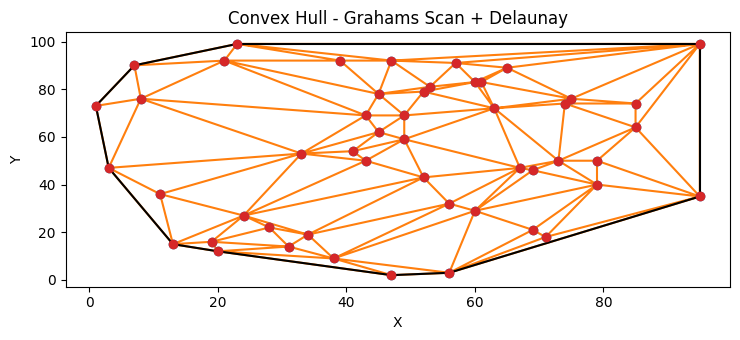

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.spatial import Delaunay

def points_generator2D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 99)
            y = random.randint(0, 99)
            if (x, y) not in points :
                points.append((x, y))
                break
    return points
def points_generator2D(num) :
    points = []
    for _ in range(num) :
        while True :
            x = random.randint(0, 99)
            y = random.randint(0, 99)
            if (x, y) not in points :
                points.append((x, y))
                break
    return points

def ccw(i, j, k) :
    det = j[0]*k[1] - k[0]*j[1] - i[0]*k[1] + i[1]*k[0] + i[0]*j[1] - i[1]*j[0]
    if det == 0:
        return 0 # not in general position
    elif det > 0:
        return 1 #ccw
    else:
        return -1 #cw

def graph_hull_with_delaunay(points) :
    l_array = np.array(points)
    hull = ConvexHull(l_array)
    pyplot.plot(l_array[:, 0], l_array[:, 1], 'o')
    for simplex in hull.simplices :
        pyplot.plot(l_array[simplex, 0], l_array[simplex, 1], 'k-')
    pyplot.xlabel('X')
    pyplot.ylabel('Y')
    pyplot.title('Convex Hull - Grahams Scan + Delaunay')
    points_array = np.array(points)
    triangulation = Delaunay(points_array)
    pyplot.triplot(points_array[:,0], points_array[:,1], triangulation.simplices)
    pyplot.plot(points_array[:,0], points_array[:,1], 'o')
    pyplot.show()

points = points_generator2D(50)

# Graham's Scan using class notes
def grahams_scan(num) :
    points.sort()
    LAno = []
    LAno.append(points[0])
    LAno.append(points[1])
    for i in range(2, num) :
      LAno.append(points[i])
      size = len(LAno)
      while (size > 2) and (ccw(LAno[size -1], LAno[size - 2], LAno[size -3]) <= 0) :
        LAno.pop(size - 2)
        size = len(LAno)

    LKato = []
    LKato.append(points[num - 1])
    LKato.append(points[num - 2])
    for i in range(num - 3, -1, -1) :
        LKato.append(points[i])
        size2 = len(LKato)
        while (size2 > 2) and ccw(LKato[size2 -1], LKato[size2 - 2], LKato[size2 -3]) <= 0 :
          LKato.pop(size2 - 2)
          size2 = len(LKato)

    LKato.pop(0)
    sizeLKato = len(LKato) - 1
    LKato.pop(sizeLKato)
    L = []
    for x, y in LAno:
      L.append((x,y))
    for x, y in LKato:
      L.append((x,y))

    graph_hull_with_delaunay(points)
    return L

L = grahams_scan(50) # Execute algorithm for 50 points